# Merge ranking files 



In [30]:
import os
import pandas as pd

In [31]:
# filenames
house_school_rank_file = os.path.join("Results","house_afford_school_ranking.csv")
city_demographic_file = os.path.join("Results","Cities_Demographics_Scores.csv")
amenities_file = os.path.join("Results","Final City Ranking for Amenities.csv")

In [32]:
housing_school_rank = pd.read_csv(house_school_rank_file)
demographic_rank = pd.read_csv(city_demographic_file)
amenities_rank = pd.read_csv(amenities_file)

In [33]:
housing_school_rank

,City,own,rent,schools,college
0,Raleigh,8,8,3,8
1,Austin,7,7,7,3
2,Washington DC,6,6,5,2
3,Atlanta,5,4,6,6
4,Chicago,4,5,2,1
5,New York,3,2,4,5
6,Boston,2,3,1,4
7,Los Angeles,1,1,8,7


In [34]:
demographic_rank

,Unnamed: 0,NAME,City,TechPool_Score,EduAtt_Score,Crime_Score,Diversity_Score
0,0,"Washington city, District of Columbia",Washington DC,8,8,2,4
1,1,"New York city, New York",New York,2,1,8,8
2,2,"Boston city, Massachusetts",Boston,5,4,6,3
3,3,"Chicago city, Illinois",Chicago,3,3,3,6
4,4,"Los Angeles city, California",Los Angeles,1,2,4,7
5,5,"Raleigh city, North Carolina",Raleigh,6,6,7,2
6,6,"Austin city, Texas",Austin,4,7,5,5
7,7,"Atlanta city, Georgia",Atlanta,7,5,1,1


In [35]:
# INSERT HERE other ranking files 
demographic_rank = demographic_rank.drop(['Unnamed: 0','NAME'], axis=1)

In [36]:
# combine ranking into one file
combined_rank = pd.merge(housing_school_rank,
                         demographic_rank,
                         on='City')


In [37]:
amenities_rank=amenities_rank.drop("Unnamed: 0", axis=1)


In [38]:
amenities_rank

,City Name,Refreshments,Accomodations,Emergency,Errands,Fitness,Crime Rate,Total Score,Final Rank
0,Chicago,8,7,7,6,7,5,40,1
1,Boston,7,6,6,8,6,3,36,2
2,New York,3,8,8,7,8,1,35,3
3,Washington DC,5,1,5,5,5,7,28,4
4,Atlanta,6,2,3,3,1,8,23,5
5,Los Angeles,2,3,4,4,4,2,19,6
6,Austin,1,5,1,2,3,6,18,7
7,Raleigh,4,4,2,1,2,4,17,8


In [39]:
amenities_rank=amenities_rank.drop(["Final Rank",'Total Score'], axis=1)
amenities_rank

,City Name,Refreshments,Accomodations,Emergency,Errands,Fitness,Crime Rate
0,Chicago,8,7,7,6,7,5
1,Boston,7,6,6,8,6,3
2,New York,3,8,8,7,8,1
3,Washington DC,5,1,5,5,5,7
4,Atlanta,6,2,3,3,1,8
5,Los Angeles,2,3,4,4,4,2
6,Austin,1,5,1,2,3,6
7,Raleigh,4,4,2,1,2,4


In [40]:
amenities_rank = amenities_rank.rename(columns={'City Name':'City'})

In [41]:
#INSERT HERE
# repeat merging (above cell) with additional csv that have been read
# sample combined_rank = combined_rank.merge(other_rank, on='City')
combined_rank = combined_rank.merge(amenities_rank, on='City')
combined_rank

,City,own,rent,schools,college,TechPool_Score,EduAtt_Score,Crime_Score,Diversity_Score,Refreshments,Accomodations,Emergency,Errands,Fitness,Crime Rate
0,Raleigh,8,8,3,8,6,6,7,2,4,4,2,1,2,4
1,Austin,7,7,7,3,4,7,5,5,1,5,1,2,3,6
2,Washington DC,6,6,5,2,8,8,2,4,5,1,5,5,5,7
3,Atlanta,5,4,6,6,7,5,1,1,6,2,3,3,1,8
4,Chicago,4,5,2,1,3,3,3,6,8,7,7,6,7,5
5,New York,3,2,4,5,2,1,8,8,3,8,8,7,8,1
6,Boston,2,3,1,4,5,4,6,3,7,6,6,8,6,3
7,Los Angeles,1,1,8,7,1,2,4,7,2,3,4,4,4,2


In [42]:
c = combined_rank.set_index("City")
c

,own,rent,schools,college,TechPool_Score,EduAtt_Score,Crime_Score,Diversity_Score,Refreshments,Accomodations,Emergency,Errands,Fitness,Crime Rate
City,,,,,,,,,,,,,,
Raleigh,8,8,3,8,6,6,7,2,4,4,2,1,2,4
Austin,7,7,7,3,4,7,5,5,1,5,1,2,3,6
Washington DC,6,6,5,2,8,8,2,4,5,1,5,5,5,7
Atlanta,5,4,6,6,7,5,1,1,6,2,3,3,1,8
Chicago,4,5,2,1,3,3,3,6,8,7,7,6,7,5
New York,3,2,4,5,2,1,8,8,3,8,8,7,8,1
Boston,2,3,1,4,5,4,6,3,7,6,6,8,6,3
Los Angeles,1,1,8,7,1,2,4,7,2,3,4,4,4,2


In [44]:
## Write to CSV fike the combined rank

combined_rank_file = os.path.join("Results","amenities_demographics_house_afford_school_ranking.csv")
c.to_csv(combined_rank_file)

# SAMPLE  Visualize Combined Ranking

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [46]:
# read input from CSV
c = pd.read_csv(combined_rank_file)
c

,City,own,rent,schools,college,TechPool_Score,EduAtt_Score,Crime_Score,Diversity_Score,Refreshments,Accomodations,Emergency,Errands,Fitness,Crime Rate
0,Raleigh,8,8,3,8,6,6,7,2,4,4,2,1,2,4
1,Austin,7,7,7,3,4,7,5,5,1,5,1,2,3,6
2,Washington DC,6,6,5,2,8,8,2,4,5,1,5,5,5,7
3,Atlanta,5,4,6,6,7,5,1,1,6,2,3,3,1,8
4,Chicago,4,5,2,1,3,3,3,6,8,7,7,6,7,5
5,New York,3,2,4,5,2,1,8,8,3,8,8,7,8,1
6,Boston,2,3,1,4,5,4,6,3,7,6,6,8,6,3
7,Los Angeles,1,1,8,7,1,2,4,7,2,3,4,4,4,2


In [47]:
# make the city the index
c = c.set_index('City')

In [48]:
# ensure valus are integers and not strings
c = c.apply(pd.to_numeric)

In [49]:
c

,own,rent,schools,college,TechPool_Score,EduAtt_Score,Crime_Score,Diversity_Score,Refreshments,Accomodations,Emergency,Errands,Fitness,Crime Rate
City,,,,,,,,,,,,,,
Raleigh,8,8,3,8,6,6,7,2,4,4,2,1,2,4
Austin,7,7,7,3,4,7,5,5,1,5,1,2,3,6
Washington DC,6,6,5,2,8,8,2,4,5,1,5,5,5,7
Atlanta,5,4,6,6,7,5,1,1,6,2,3,3,1,8
Chicago,4,5,2,1,3,3,3,6,8,7,7,6,7,5
New York,3,2,4,5,2,1,8,8,3,8,8,7,8,1
Boston,2,3,1,4,5,4,6,3,7,6,6,8,6,3
Los Angeles,1,1,8,7,1,2,4,7,2,3,4,4,4,2


In [50]:
# prefix all column names with same string
for col in c.columns: 
    c=c.rename(columns={col:'rating_'+col})
c    

,rating_own,rating_rent,rating_schools,rating_college,rating_TechPool_Score,rating_EduAtt_Score,rating_Crime_Score,rating_Diversity_Score,rating_Refreshments,rating_Accomodations,rating_Emergency,rating_Errands,rating_Fitness,rating_Crime Rate
City,,,,,,,,,,,,,,
Raleigh,8,8,3,8,6,6,7,2,4,4,2,1,2,4
Austin,7,7,7,3,4,7,5,5,1,5,1,2,3,6
Washington DC,6,6,5,2,8,8,2,4,5,1,5,5,5,7
Atlanta,5,4,6,6,7,5,1,1,6,2,3,3,1,8
Chicago,4,5,2,1,3,3,3,6,8,7,7,6,7,5
New York,3,2,4,5,2,1,8,8,3,8,8,7,8,1
Boston,2,3,1,4,5,4,6,3,7,6,6,8,6,3
Los Angeles,1,1,8,7,1,2,4,7,2,3,4,4,4,2


In [51]:
# prepare for visual
c = c.reset_index()
c = c.melt('City', var_name='rating', value_name='vals')


In [52]:
g = sns.factorplot(kind='bar',x="vals", y='City',hue='rating', data=c, size=10)

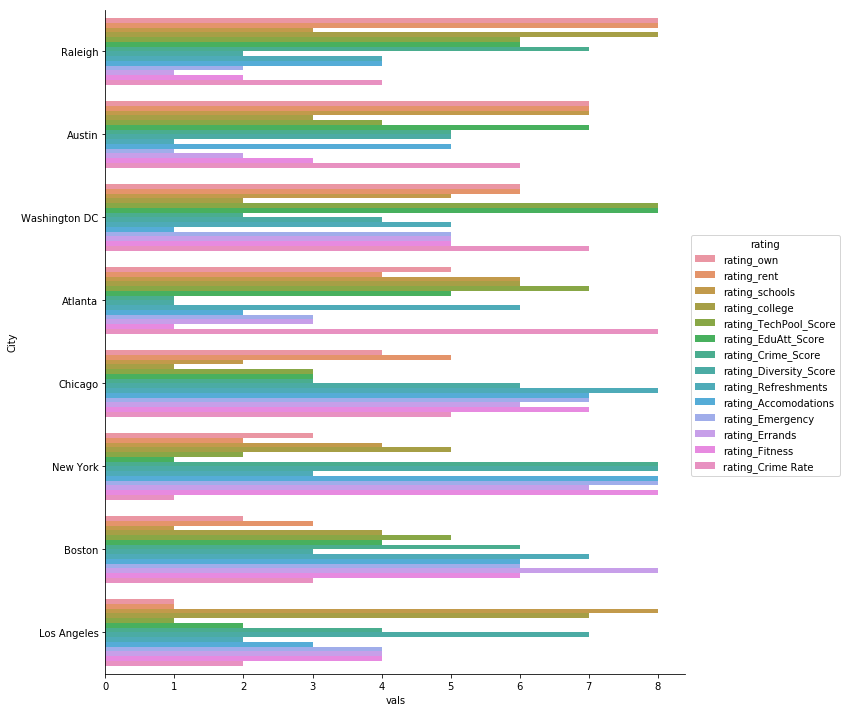

In [53]:
combined_ranking_visual = os.path.join("Plots","amenities_combined_ranking_visual.png")
plt.savefig(combined_ranking_visual)
plt.show()

# Combined final ranking

addig the rank values for each city to get a final ranking

In [54]:
# Read combined ranking dataframe
combined_rank_file = os.path.join("Results","amenities_demographics_house_afford_school_ranking.csv")
c = pd.read_csv(combined_rank_file)
c = combined_rank.set_index("City")

In [55]:
# ensure all values are integers, note the City is intentionally the index so that it does not 
# attempt to convert a city name into integer
c= c.apply(pd.to_numeric)

In [56]:
# get names for all the rankings
columns = c.columns
columns

Index(['own', 'rent', 'schools', 'college', 'TechPool_Score', 'EduAtt_Score',
       'Crime_Score', 'Diversity_Score', 'Refreshments', 'Accomodations',
       'Emergency', 'Errands', 'Fitness', 'Crime Rate'],
      dtype='object')

In [57]:
c

,own,rent,schools,college,TechPool_Score,EduAtt_Score,Crime_Score,Diversity_Score,Refreshments,Accomodations,Emergency,Errands,Fitness,Crime Rate
City,,,,,,,,,,,,,,
Raleigh,8,8,3,8,6,6,7,2,4,4,2,1,2,4
Austin,7,7,7,3,4,7,5,5,1,5,1,2,3,6
Washington DC,6,6,5,2,8,8,2,4,5,1,5,5,5,7
Atlanta,5,4,6,6,7,5,1,1,6,2,3,3,1,8
Chicago,4,5,2,1,3,3,3,6,8,7,7,6,7,5
New York,3,2,4,5,2,1,8,8,3,8,8,7,8,1
Boston,2,3,1,4,5,4,6,3,7,6,6,8,6,3
Los Angeles,1,1,8,7,1,2,4,7,2,3,4,4,4,2


In [58]:
# Compute totals for each city

c['total']=0
for col in columns:
    c['total']=c['total']+c[col]
c    

,own,rent,schools,college,TechPool_Score,EduAtt_Score,Crime_Score,Diversity_Score,Refreshments,Accomodations,Emergency,Errands,Fitness,Crime Rate,total
City,,,,,,,,,,,,,,,
Raleigh,8,8,3,8,6,6,7,2,4,4,2,1,2,4,65
Austin,7,7,7,3,4,7,5,5,1,5,1,2,3,6,63
Washington DC,6,6,5,2,8,8,2,4,5,1,5,5,5,7,69
Atlanta,5,4,6,6,7,5,1,1,6,2,3,3,1,8,58
Chicago,4,5,2,1,3,3,3,6,8,7,7,6,7,5,67
New York,3,2,4,5,2,1,8,8,3,8,8,7,8,1,68
Boston,2,3,1,4,5,4,6,3,7,6,6,8,6,3,64
Los Angeles,1,1,8,7,1,2,4,7,2,3,4,4,4,2,50


In [59]:
# Drop all columns, only need the totals
total = c[['total']]
total = total.sort_values('total', ascending=False)
total = total.reset_index()

In [60]:
total

,City,total
0,Washington DC,69
1,New York,68
2,Chicago,67
3,Raleigh,65
4,Boston,64
5,Austin,63
6,Atlanta,58
7,Los Angeles,50


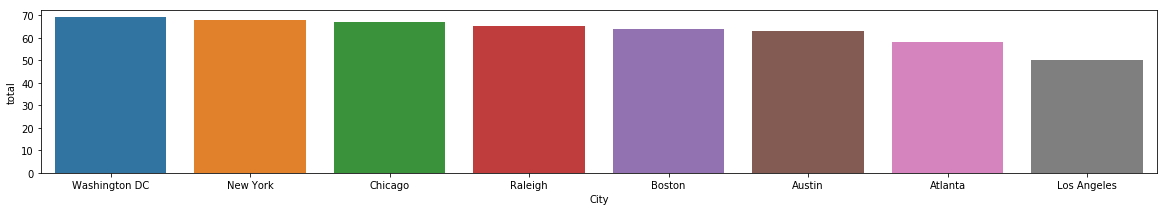

In [61]:
# plot the results
plt.figure(figsize=(20,3))
sns.barplot(x='City',y='total',data=total)
combined_ranking_visual = os.path.join("Plots","combined_total_ranking_visual.png")
plt.savefig(combined_ranking_visual)
plt.show()